Hi các bạn, cũng đã đến những buổi cuối cùng của lớp Python Private, chúng ta đã đi qua nhiều kiến thức cơ bản cũng như các thư viện hữu dụng cho hướng phát triển của lớp sau này, bài tập này là bài tập tổng hợp lại kiến thức cho các bạn trước khi bước vào bài tập lớn cuối khóa nhé.

Yêu cầu chung cho bài tập như sau:
- Tạo folder finalHomework trên drive của mình, tạo bản sao từ google colab này và lưu lại trong đó
- Ở các vị trị có dấu ... các bạn sẽ thay thế nó bằng câu lệnh phù hợp nhé
- Có thể thêm cell code để tách rời các đoạn code cho rõ ràng hơn
- Link dataset:
  + Fifa World Cup 2022 Qatar: [data](https://drive.google.com/drive/folders/1toqv_FTlsi6-NfswfzKnK9GBYAE8i57L?usp=sharing)

Anh mong các bạn sẽ làm bài tập đầy đủ để có thể review lại kiến thức của bản thân nhé !!!

Yêu các bạn <3



# Set up

## Import các thư viện cần thiết

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

## Kết nối với google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Di chuyển đến thư mục chứa google colab

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

## Upload file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving matches_world_cup_2022_catar.csv to matches_world_cup_2022_catar (1).csv


## List các file trong thư mục

In [ ]:
file_list = os.listdir()
file_list

['Day 1.ipynb',
 'Day 2.ipynb',
 'Day 3.ipynb',
 'Parallel programming.ipynb',
 'Pandas.ipynb',
 'Pandasreal.ipynb',
 'Dekiru-N.Cuong',
 'matches_world_cup_2022_catar.csv']

# Numpy

In [ ]:
# Init
import random
import numpy as np

prices = list(range(1, 1000000))
random.shuffle(prices)

In [ ]:
# hàm ban đầu
def find_max_down_fall(prices):
  min_right_to_left = [0 for i in range((len(prices)))]

  min_so_far = float('inf')
  for i in range(len(prices) -1, -1, -1):
    min_so_far = min(prices[i], min_so_far)
    min_right_to_left[i] = min_so_far

  res = 0
  for i, buy in enumerate(prices):
    worst_sell = min_right_to_left[i]
    down_fall = (buy - worst_sell) / buy
    res = max(res, down_fall)

  return res

In [ ]:
# Tính thời gian thực hiện của hàm find_max_down_fall
%timeit find_max_down_fall(prices)

786 ms ± 37 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# hàm sau khi được viết lại bằng numpy
def find_max_down_fall_np(prices_np):
  # start your code here
  min_right_to_left = np.minimum.accumulate(prices[::-1])[::-1]
  down_fall = (prices - min_right_to_left) / prices
  return np.max(down_fall)
  # end your code

In [ ]:
# Tính thời gian thực hiện của hàm find_max_down_fall sau khi được viết lại bằng numpy với thời gian kì vọng nhanh hơn khoảng 100 lần
# start your code here
prices_np = np.array([prices])
# end your code

%timeit find_max_down_fall_np(prices_np)

859 ms ± 252 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# so sánh kết quả
find_max_down_fall(prices) == find_max_down_fall_np(prices_np)

True

# Pandas + Matplotlib

## Gọi file csv

In [ ]:
import ast
uploaded = files.upload()

Saving Argentina_events_world_cup_2022_quata.csv to Argentina_events_world_cup_2022_quata (1).csv


In [ ]:
df_matches = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/matches_world_cup_2022_catar.csv')
df = df_matches['events_list']
df = df.to_frame()
df1 = df['events_list'].tolist()

filenew = []
for i in df1:
    tmp = ast.literal_eval(i)
    filenew += tmp


res = pd.DataFrame(filenew)
res.to_csv('events_world_cup_2022_quata.csv')
# files.download('events_world_cup_2022_quata.csv')
df2 = pd.read_csv('events_world_cup_2022_quata.csv')
df_events = df2.drop(columns=['Unnamed: 0'])

In [ ]:
df_events

,event_team,event_time,event_type,action_player_1,action_player_2,event_result,event_player
0,home,23',Penalty,Lionel Messi,Penalty,NaN,NaN
1,home,36',Goal,Ángel Di María,Alexis Mac Allister,NaN,NaN
2,away,41',Substitution,Randal Kolo Muani,Ousmane Dembélé,NaN,NaN
3,away,41',Substitution,Marcus Thuram,Olivier Giroud,NaN,NaN
4,home,52',Yellow card,Enzo Fernández,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1038,home,72',Substitution,Mohammed Muntari,Almoez Ali,NaN,NaN
1039,away,77',Substitution,José Cifuentes,Enner Valencia,NaN,NaN
1040,home,78',Yellow card,Akram Afif,NaN,NaN,NaN
1041,away,90',Substitution,Kevin Rodríguez,Michael Estrada,NaN,NaN


## Hiển thị 5 dòng đầu của dataframe

In [ ]:
df_matches.head()

,match_id,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,...,prediction_team_away_win,prediction_quantity,location,events_list,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away
0,1,Final,18/12/2022,True,4,2,Argentina,France,3,3,...,0.33,1002364,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 23' "",...","[{'player_name': ' Di María ', 'player_number'...","[{'player_name': ' Giroud ', 'player_number': ...","['Di María', 'Álvarez', 'Messi', 'Mac Allister...","['11', '9', '10', '20', '24', '7', '3', '19', ...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ..."
1,2,Match for third place,17/12/2022,False,False,False,Croatia,Morocco,2,1,...,0.54,367156,Khalifa International Stadium,"[{'event_team': 'home', 'event_time': "" 7' "", ...","[{'player_name': ' Livaja ', 'player_number': ...","[{'player_name': ' Boufal ', 'player_number': ...","['Livaja', 'Oršić', 'Kramarić', 'Majer', 'Kova...","['14', '18', '9', '7', '8', '10', '4', '20', '...","['Boufal', 'En-Nesyri', 'Ziyech', 'Sabiri', 'A...","['17', '19', '7', '11', '4', '23', '25', '20',..."
2,3,Semi-finals,14/12/2022,False,False,False,France,Morocco,2,0,...,0.39,720768,Al Bayt Stadium,"[{'event_team': 'home', 'event_time': "" 5' "", ...","[{'player_name': ' Giroud ', 'player_number': ...","[{'player_name': ' En-Nesyri ', 'player_number...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '13', '8', '22', '24', ...","['En-Nesyri', 'Boufal', 'Amrabat', 'Ounahi', '...","['19', '17', '4', '8', '7', '3', '18', '6', '2..."
3,4,Semi-finals,13/12/2022,False,False,False,Argentina,Croatia,3,0,...,0.25,792326,Lusail Iconic Stadium,"[{'event_team': 'away', 'event_time': "" 32' "",...","[{'player_name': ' Álvarez ', 'player_number':...","[{'player_name': ' Perišić ', 'player_number':...","['Álvarez', 'Messi', 'Mac Allister', 'Fernánde...","['9', '10', '20', '24', '5', '7', '3', '19', '...","['Perišić', 'Kramarić', 'Pašalić', 'Kovačić', ...","['4', '9', '15', '8', '11', '10', '19', '20', ..."
4,5,Quarter-finals,10/12/2022,False,False,False,England,France,1,2,...,0.55,672577,Al Bayt Stadium,"[{'event_team': 'away', 'event_time': "" 17' "",...","[{'player_name': ' Foden ', 'player_number': '...","[{'player_name': ' Giroud ', 'player_number': ...","['Foden', 'Kane', 'Saka', 'Bellingham', 'Rice'...","['20', '9', '17', '22', '4', '8', '3', '6', '5...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ..."


## Hiển thị 5 dòng cuối của các dataframe

In [ ]:
df_matches.tail()

,match_id,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,...,prediction_team_away_win,prediction_quantity,location,events_list,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away
59,60,Group stage: Matchday 1,22/11/2022,False,False,False,Argentina,Saudi Arabia,1,2,...,0.04,657383,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 10' "",...","[{'player_name': ' Martínez ', 'player_number'...","[{'player_name': ' Al-Shehri ', 'player_number...","['Martínez', 'Messi', 'Gómez', 'Paredes', 'De ...","['22', '10', '17', '5', '7', '11', '3', '19', ...","['Al-Shehri', 'Al-Dawsari', 'Kanno', 'Al-Faraj...","['11', '10', '23', '7', '9', '8', '13', '5', '..."
60,61,Group stage: Matchday 1,21/11/2022,False,False,False,USA,Wales,1,1,...,0.40,361145,Ahmad bin Ali Stadium,"[{'event_team': 'home', 'event_time': "" 11' "",...","[{'player_name': ' Pulisic ', 'player_number':...","[{'player_name': ' James ', 'player_number': '...","['Pulisic', 'Sargent', 'Weah', 'Musah', 'Adams...","['10', '24', '21', '6', '4', '8', '5', '13', '...","['James', 'Bale', 'Williams', 'Wilson', 'Ampad...","['20', '11', '3', '8', '15', '10', '14', '4', ..."
61,62,Group stage: Matchday 1,21/11/2022,False,False,False,Senegal,Netherlands,0,2,...,0.71,457977,Al Thumama Stadium,"[{'event_team': 'away', 'event_time': "" 56' "",...","[{'player_name': ' Dia ', 'player_number': ' 9...","[{'player_name': ' Bergwijn ', 'player_number'...","['Dia', 'Sarr', 'Gueye', 'Diatta', 'Mendy', 'K...","['9', '18', '5', '15', '6', '8', '22', '4', '3...","['Bergwijn', 'Janssen', 'Gakpo', 'Blind', 'De ...","['7', '18', '8', '17', '21', '11', '22', '5', ..."
62,63,Group stage: Matchday 1,21/11/2022,False,False,False,England,Iran,6,2,...,0.06,498752,Khalifa International Stadium,"[{'event_team': 'away', 'event_time': "" 20' "",...","[{'player_name': ' Kane ', 'player_number': ' ...","[{'player_name': ' Taremi ', 'player_number': ...","['Kane', 'Sterling', 'Mount', 'Saka', 'Rice', ...","['9', '10', '19', '17', '4', '22', '3', '6', '...","['Taremi', 'Hajsafi', 'Karimi', 'Nourollahi', ...","['9', '3', '18', '21', '7', '5', '19', '15', '..."
63,64,Group stage: Matchday 1,20/11/2022,False,False,False,Qatar,Ecuador,0,2,...,0.66,528736,Al Bayt Stadium,"[{'event_team': 'away', 'event_time': "" 4' "", ...","[{'player_name': ' Afif ', 'player_number': ' ...","[{'player_name': ' Estrada ', 'player_number':...","['Afif', 'Almoez', 'Abdulaziz', 'Boudiaf', 'Al...","['11', '19', '6', '12', '10', '14', '3', '16',...","['Estrada', 'Valencia', 'Ibarra', 'Caicedo', '...","['11', '13', '10', '23', '20', '19', '7', '3',..."


## In ra thông tin của từng dataframe

In [ ]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match_id                  64 non-null     int64  
 1   stage                     64 non-null     object 
 2   date                      64 non-null     object 
 3   pens                      64 non-null     bool   
 4   pens_home_score           64 non-null     object 
 5   pens_away_score           64 non-null     object 
 6   team_name_home            64 non-null     object 
 7   team_name_away            64 non-null     object 
 8   team_home_score           64 non-null     int64  
 9   team_away_score           64 non-null     int64  
 10  possession_home           64 non-null     float64
 11  possession_away           64 non-null     float64
 12  total_shots_home          64 non-null     int64  
 13  total_shots_away          64 non-null     int64  
 14  shots_on_tar

In [ ]:
if df_matches.isnull().sum().any() > 0:
  print("Has Null value")
else: print("Hasn't null value")

Hasn't null value


- Hãy kiểm tra xem các data frame có giá trị null không
- Nếu có hãy trình bày cách giải quyết của bản thân đối với dữ liệu null đó, và code cách giải quyết dưới cell code bên dưới
- Nếu không có cách giải quyết thì cũng ghi là không có cách giải quyết


Ghi cách giải quyết của bản thân vào đây: ...

In [ ]:
df_matches.isnull().sum()

match_id                    0
stage                       0
date                        0
pens                        0
pens_home_score             0
pens_away_score             0
team_name_home              0
team_name_away              0
team_home_score             0
team_away_score             0
possession_home             0
possession_away             0
total_shots_home            0
total_shots_away            0
shots_on_target_home        0
shots_on_target_away        0
duels_won_home              0
duels_won_away              0
prediction_team_home_win    0
prediction_draw             0
prediction_team_away_win    0
prediction_quantity         0
location                    0
events_list                 0
lineup_home                 0
lineup_away                 0
player_names_home           0
player_numbers_home         0
player_names_away           0
player_numbers_away         0
dtype: int64

## Lấy ra các trận đấu có từ 3 bàn thắng trở lên (ghi ra tên cặp đấu)

In [ ]:
df_matches[(df_matches['team_home_score'] + df_matches['team_away_score']) >= 3]

,match_id,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,...,prediction_team_away_win,prediction_quantity,location,events_list,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away
0,1,Final,18/12/2022,True,4,2,Argentina,France,3,3,...,0.33,1002364,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 23' "",...","[{'player_name': ' Di María ', 'player_number'...","[{'player_name': ' Giroud ', 'player_number': ...","['Di María', 'Álvarez', 'Messi', 'Mac Allister...","['11', '9', '10', '20', '24', '7', '3', '19', ...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ..."
1,2,Match for third place,17/12/2022,False,False,False,Croatia,Morocco,2,1,...,0.54,367156,Khalifa International Stadium,"[{'event_team': 'home', 'event_time': "" 7' "", ...","[{'player_name': ' Livaja ', 'player_number': ...","[{'player_name': ' Boufal ', 'player_number': ...","['Livaja', 'Oršić', 'Kramarić', 'Majer', 'Kova...","['14', '18', '9', '7', '8', '10', '4', '20', '...","['Boufal', 'En-Nesyri', 'Ziyech', 'Sabiri', 'A...","['17', '19', '7', '11', '4', '23', '25', '20',..."
3,4,Semi-finals,13/12/2022,False,False,False,Argentina,Croatia,3,0,...,0.25,792326,Lusail Iconic Stadium,"[{'event_team': 'away', 'event_time': "" 32' "",...","[{'player_name': ' Álvarez ', 'player_number':...","[{'player_name': ' Perišić ', 'player_number':...","['Álvarez', 'Messi', 'Mac Allister', 'Fernánde...","['9', '10', '20', '24', '5', '7', '3', '19', '...","['Perišić', 'Kramarić', 'Pašalić', 'Kovačić', ...","['4', '9', '15', '8', '11', '10', '19', '20', ..."
4,5,Quarter-finals,10/12/2022,False,False,False,England,France,1,2,...,0.55,672577,Al Bayt Stadium,"[{'event_team': 'away', 'event_time': "" 17' "",...","[{'player_name': ' Foden ', 'player_number': '...","[{'player_name': ' Giroud ', 'player_number': ...","['Foden', 'Kane', 'Saka', 'Bellingham', 'Rice'...","['20', '9', '17', '22', '4', '8', '3', '6', '5...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ..."
6,7,Quarter-finals,09/12/2022,True,3,4,Netherlands,Argentina,2,2,...,0.73,690889,Lusail Iconic Stadium,"[{'event_team': 'away', 'event_time': "" 35' "",...","[{'player_name': ' Memphis ', 'player_number':...","[{'player_name': ' Álvarez ', 'player_number':...","['Memphis', 'Bergwijn', 'Gakpo', 'Blind', 'De ...","['10', '7', '8', '17', '21', '15', '22', '5', ...","['Álvarez', 'Messi', 'Mac Allister', 'Fernánde...","['9', '10', '20', '24', '7', '8', '25', '19', ..."
8,9,Round of 16,06/12/2022,False,False,False,Portugal,Switzerland,6,1,...,0.17,487290,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 17' "",...","[{'player_name': ' Félix ', 'player_number': '...","[{'player_name': ' Shaqiri ', 'player_number':...","['Félix', 'Ramos', 'Fernandes', 'Bernardo Silv...","['11', '26', '8', '10', '14', '25', '5', '4', ...","['Shaqiri', 'Embolo', 'Vargas', 'Freuler', 'So...","['23', '7', '17', '8', '15', '2', '10', '13', ..."
10,11,Round of 16,05/12/2022,False,False,False,Brazil,South Korea,4,1,...,0.08,610646,Stadium 974,"[{'event_team': 'home', 'event_time': "" 7' "", ...","[{'player_name': ' Richarlison ', 'player_numb...","[{'player_name': ' Son Heung-min ', 'player_nu...","['Richarlison', 'Vinícius Júnior', 'Neymar', '...","['9', '20', '10', '11', '5', '7', '2', '3', '4...","['Son Heung-min', 'Cho Gue-sung', 'Hwang Hee-c...","['7', '9', '11', '6', '5', '10', '3', '19', '4..."
12,13,Round of 16,04/12/2022,False,False,False,England,Senegal,3,0,...,0.21,419533,Al Bayt Stadium,"[{'event_team': 'home', 'event_time': "" 39' "",...","[{'player_name': ' Foden ', 'player_number': '...","[{'player_name': ' Dia ', 'player_number': ' 9...","['Foden', 'Kane', 'Saka', 'Bellingham', 'Rice'...","['20', '9', '17', '22', '4', '8', '3', '6', '5...","['Dia', 'Sarr', 'Ndiaye', 'Diatta', 'Mendy', '...","['9', '18'

## Thống kê các sân vận động diễn ra các trận đấu và hiển thị tỷ lệ phần trăm của các sân vận động bằng biểu đồ thích hợp

In [ ]:
df_matches.groupby(by= 'location').count()['match_id']
piechart = df_matches.groupby(by= 'location').count()['match_id']

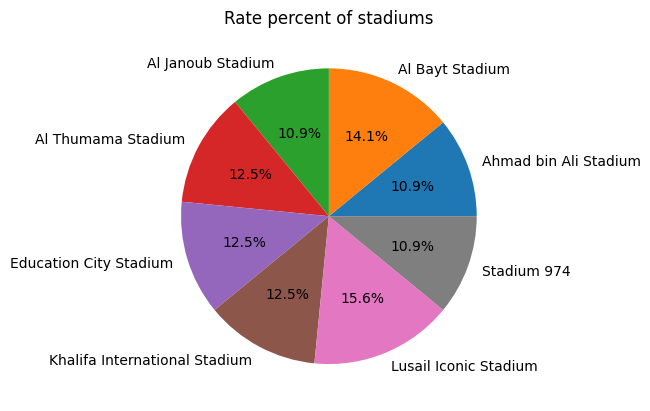

In [ ]:
plt.pie(piechart, labels=piechart.index, autopct='%1.1f%%')
plt.title('Rate percent of stadiums')
plt.show()

## Lấy ra tên của các đội tham dự giải đấu

---



In [ ]:
df_matches['team_name_home'].unique()

array(['Argentina', 'Croatia', 'France', 'England', 'Morocco',
       'Netherlands', 'Portugal', 'Brazil', 'Japan', 'Cameroon', 'Serbia',
       'South Korea', 'Ghana', 'Costa Rica', 'Canada', 'Poland',
       'Saudi Arabia', 'Tunisia', 'Australia', 'Wales', 'Iran', 'Ecuador',
       'Spain', 'Belgium', 'Qatar', 'Uruguay', 'Switzerland', 'Germany',
       'Mexico', 'Denmark', 'USA', 'Senegal'], dtype=object)

## Lấy ra số bàn thắng được ghi bởi các đội


In [ ]:
home_goals = df_matches.groupby(by = 'team_name_home')['team_home_score'].sum()
away_goals = df_matches.groupby(by = 'team_name_away')['team_away_score'].sum()

total_goals = pd.DataFrame({
    'Team name': home_goals.index,
    'Total goals' : home_goals.values + away_goals.values
})

total_goals

,Team name,Total goals
0,Argentina,15
1,Australia,4
2,Belgium,1
3,Brazil,8
4,Cameroon,4
5,Canada,2
6,Costa Rica,3
7,Croatia,8
8,Denmark,1
9,Ecuador,4


## Vẽ biểu đồ thể hiện số bàn thắng được ghi bởi mỗi đội (tự chọn kiểu biểu đồ phù hợp)

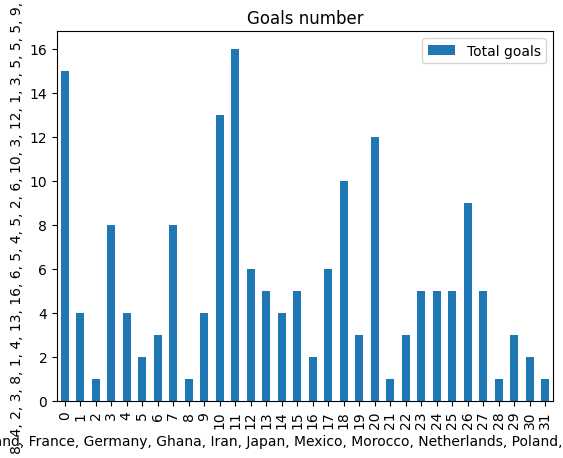

In [ ]:
total_goals.plot(kind = 'bar', xlabel = total_goals['Team name'], ylabel = total_goals['Total goals'], title = 'Goals number')
# plt.pie(total_goals['Total goals'], labels=total_goals['Team name'], autopct='%1.1f%%')
plt.show()

##Thống kê số lượng bàn thắng được ghi bởi các cầu thủ Argentina bằng biểu đồ tròn

- Yêu cầu phải có tiêu đề cho biểu đồ, chú thích
- Có tỷ lệ phần trăm cho từng cầu thủ
- Tách phần của Alexis Mac Allister ra khỏi biểu đồ

In [ ]:
Argentinamatches = df_matches[df_matches['team_name_home'].isin (['Argentina']) | df_matches['team_name_away'].isin (['Argentina'])]
tmp = Argentinamatches['events_list']
tmp = tmp.to_frame()
df1 = tmp['events_list'].tolist()

filenew = []
for i in df1:
    tmp = ast.literal_eval(i)
    filenew += tmp


res = pd.DataFrame(filenew)
res.to_csv('Argentina_events_world_cup_2022_quata.csv')
files.download('Argentina_events_world_cup_2022_quata.csv')
df2 = pd.read_csv('Argentina_events_world_cup_2022_quata.csv')
df_events_Argentina = df2.drop(columns=['Unnamed: 0'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_events_Argentina

,event_team,event_time,event_type,action_player_1,action_player_2,event_result,event_player
0,home,23',Penalty,Lionel Messi,Penalty,NaN,NaN
1,home,36',Goal,Ángel Di María,Alexis Mac Allister,NaN,NaN
2,away,41',Substitution,Randal Kolo Muani,Ousmane Dembélé,NaN,NaN
3,away,41',Substitution,Marcus Thuram,Olivier Giroud,NaN,NaN
4,home,52',Yellow card,Enzo Fernández,NaN,NaN,NaN
...,...,...,...,...,...,...,...
153,away,88',Substitution,Abdulelah Al-Amri,Nawaf Al-Abed,NaN,NaN
154,away,88',Yellow card,Nawaf Al-Abed,NaN,NaN,NaN
155,away,89',Substitution,Haitham Asiri,Firas Al-Buraikan,NaN,NaN
156,away,92',Yellow card,Mohammed Al-Owais,NaN,NaN,NaN


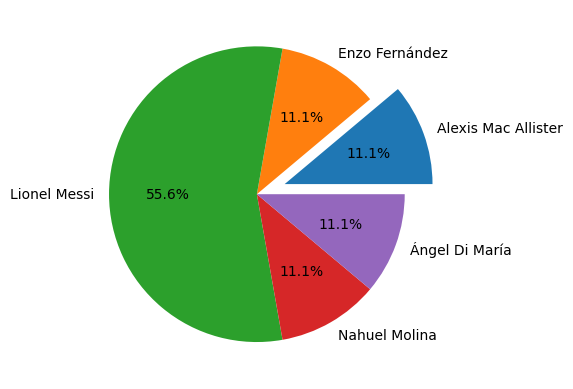

In [ ]:
# Danh sách cầu thủ Argentina
ArgentinaPlayer = [' Papu Gómez ', ' Lionel Messi ', ' Julián Álvarez ', ' Alexis Mac Allister ', ' Enzo Fernández ', ' Rodrigo De Paul ', ' Marcos Acuña ', ' Nicolás Otamendi ', ' Cristian Romero ', ' Nahuel Molina ', ' Lautaro Martínez ']

goals_penalties = df_events_Argentina[(df_events_Argentina['event_type'].isin(['Goal', 'Penalty'])) & (df_events_Argentina['action_player_1'].isin(ArgentinaPlayer) | df_events_Argentina['action_player_2'].isin(ArgentinaPlayer))]

goal_penalty_counts = goals_penalties['action_player_1'].value_counts() + goals_penalties['action_player_2'].value_counts()

goal_penalty_counts = goal_penalty_counts.to_frame()
goal_penalty_counts_real = goal_penalty_counts.dropna(axis=0)
goal_penalty_counts_real
nameplayer = ['Alexis Mac Allister', 'Enzo Fernández', 'Lionel Messi', 'Nahuel Molina', 'Ángel Di María']
topaint = goal_penalty_counts_real.values
topaint = np.array(topaint)
topaint = topaint.flatten()
myexplode = [0.2, 0, 0, 0, 0]
plt.pie(topaint, labels = nameplayer, explode = myexplode, autopct='%1.1f%%')
plt.show()

## Thống kê tỷ lệ ra sân của các cầu thủ Pháp bằng biểu đồ

## Thống kê danh sách top 10 vua phá lưới của giải đấu
- Nếu trường hợp hai cầu thủ có cùng số bàn thắng thì chọn cầu thủ có số lượng kiến tạo nhiều hơn
- Sử dụng biểu đồ thích hợp để hiển thị số bàn thắng của top 10

In [ ]:
...

# OpenCV

## Tìm bounding box cho các chữ số trong bức ảnh sau: [ảnh](https://1.bp.blogspot.com/-fGR7t6RnXZs/Uv5kdmT89_I/AAAAAAAAAjg/zZHfaCqnkak/s1600/freeDrawExport_012314055352.png)

- Gợi ý các hàm sử dụng:
  - cv2.threshold
  - cv2.findContours
  - cv2.contourArea
  - cv2.boundingRect

Và các hàm trong thư viện OpenCV đã học hôm trước

In [ ]:
uploaded = files.upload()

Saving freeDrawExport_012314055352.png to freeDrawExport_012314055352.png


In [ ]:
import cv2

img = cv2.imread(r'/content/drive/MyDrive/Colab Notebooks/freeDrawExport_012314055352.png')

# chuyển hình sang xám
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Sử dụng threshold để tách ngưỡng các số
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Tìm các đường viền
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# vẽ hộp giới hạn
for cnt in contours:
    if(cv2.contourArea(cnt) > 50):
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 128, 0), 1)

cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Thực hiện vẽ logo của CLB Tin Học HIT bằng OpenCV: [Vẽ logo](https://docs.google.com/document/d/1Wfg10lmyVPzGpCa6BWcMd3fpjYD3OGohoyjzy_JfcWc/edit?usp=sharing)

In [ ]:
import cv2
import numpy as np

# Tạo hình ảnh ban đầu
img = np.zeros((430, 350, 3), dtype=np.uint8)
cv2.circle(img, (175, 215), 150, (36, 135, 240), 3)
cv2.putText(img, 'HIT', (80, 255), cv2.FONT_HERSHEY_DUPLEX, 4, (36, 135, 240), 13)
cv2.putText(img, 'CLB TIN HOC DH CNHN', (90, 290), cv2.FONT_HERSHEY_DUPLEX, 0.5, (36, 135, 240), 2)

# Chữ CLUB
CLUB = np.zeros((350, 430, 3), dtype=np.uint8)
cv2.putText(CLUB, 'CLUB', (170, 270), cv2.FONT_HERSHEY_DUPLEX, 0.85, (36, 135, 240), 2)
CLUB = cv2.rotate(CLUB, cv2.ROTATE_90_COUNTERCLOCKWISE)
result_img = cv2.addWeighted(img, 1, CLUB, 1, 0)

# Mouse
ELIP = np.zeros((430, 350, 3), dtype=np.uint8)
cv2.ellipse(ELIP, (175, 140), (20, 15), 0, 0, 360, (36, 135, 240), 2)
cv2.line(ELIP, (180, 152), (180, 128), (36, 135, 240), 2)
cv2.line(ELIP, (180, 138), (205, 138), (36, 135, 240), 2)
cv2.line(ELIP, (205, 120), (205, 138), (36, 135, 240), 2)
result_real_img = cv2.addWeighted(result_img, 1, ELIP, 1, 0)

cv2.imshow('Logo: ', result_real_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


Thực hiện các yêu cầu sau đối với ảnh logo mà bạn vừa vẽ:
- Làm mịn ảnh
- Làm mờ ảnh

Sử dụng các hàm gợi ý sau:
- cv2.filter2D
- cv2.blur
- cv2.GaussianBlur
- cv2.medianBlur
- cv2.bilateralFilter

In [ ]:
...